## Exploring Data

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Before=C:\Users\1412r\sciebo\GuiltAndResponsibility\Codes


In [5]:
print(f'Before={os.getcwd()}') 
#os.chdir('C:\\Users\\1412r\\sciebo\\GuiltAndResponsibility') # Set wd to \sciebo\GuiltAndResponsibility
#print(f'After={os.getcwd()}')

Before=C:\Users\1412r\sciebo\GuiltAndResponsibility\Codes
After=C:\Users\1412r\sciebo\GuiltAndResponsibility


In [6]:
# Get csv data
path = 'SmithKrajbich2018/osfstorage-archive/socialchoicedata.csv' # on Johannes' computer
df = pd.read_csv(path, header=0)

# Housekeeping
index = [i for i in range(1, len(df)+1)]
df.drop('Unnamed: 0', inplace=True, axis=1)
df.set_index(pd.Index(index), inplace=True)
df.head()
## df.isnull().sum() # checking for empty values along columns

,SubjectNumber,Trial,LeftRight,RT,ValueUpLeft,ValueUpRight,ValueLowerLeft,ValueLowerRight,TopRowPayoffs
1,10,1,2,0.85254,205,267,202,12,Me
2,10,2,1,0.79336,71,52,100,200,Me
3,10,3,2,0.63932,10,63,284,153,Me
4,10,4,2,1.24980,220,241,220,40,Me
5,10,5,2,0.75649,59,95,294,110,Me


In [7]:
# Accounting for switch in toprow payoff being mine or others'

df['TopRow'] = df['TopRowPayoffs']=='Me'

df['MeLeft'] = df['TopRow']*df['ValueUpLeft']+(1-df['TopRow'])*df['ValueLowerLeft'] # When top row is mine take my payoff
df['MeRight'] = df['TopRow']*df['ValueUpRight']+(1-df['TopRow'])*df['ValueLowerRight'] # otherwise take the bottom row payoff

df['OtherLeft'] = df['TopRow']*df['ValueLowerLeft']+(1-df['TopRow'])*df['ValueUpLeft']
df['OtherRight'] = df['TopRow']*df['ValueLowerRight']+(1-df['TopRow'])*df['ValueUpRight']

In [8]:
df.head()

,SubjectNumber,Trial,LeftRight,RT,ValueUpLeft,ValueUpRight,ValueLowerLeft,ValueLowerRight,TopRowPayoffs,TopRow,MeLeft,MeRight,OtherLeft,OtherRight
1,10,1,2,0.85254,205,267,202,12,Me,True,205,267,202,12
2,10,2,1,0.79336,71,52,100,200,Me,True,71,52,100,200
3,10,3,2,0.63932,10,63,284,153,Me,True,10,63,284,153
4,10,4,2,1.24980,220,241,220,40,Me,True,220,241,220,40
5,10,5,2,0.75649,59,95,294,110,Me,True,59,95,294,110


Text(0, 0.5, 'Difference of payoffs in Right')

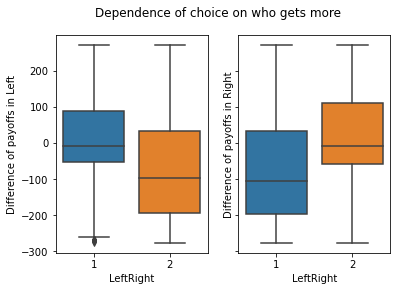

In [9]:
# Dependence of choice on who gets more

diff_L = df['MeLeft']-df['OtherLeft'] # if positive then I get more than the other guy if I choose Left
diff_R = df['MeRight']-df['OtherRight']

# Plotting choice vs who gets more
fig, axes = plt.subplots(nrows=1, ncols=2, sharey='row')
fig.suptitle('Dependence of choice on who gets more')

bp_L = sns.boxplot(x=df['LeftRight'], y=diff_L, ax=axes[0])
bp_L.set_ylabel('Difference of payoffs in Left')
bp_R = sns.boxplot(x=df['LeftRight'], y=diff_R, ax=axes[1])
bp_R.set_ylabel('Difference of payoffs in Right')

The graphs are close to being mirror images, that is because the reasons to choose Left when it is favourable would be the same when Right is choosen when it was favourable so both will produce the same result. Hence the mirror image.

This misses the information about if I choose more for me what happens to the other guy. These plots just compare that if I choose left how much more do it get from the other guy.

At average if the difference is close to zero participants accept the lottery, if it is close to -100 they reject the lottery and accept the other one. But it is not clear what participants do when the difference is close to 100, they more often reject the lottery but how to what extent do they accept the other lottery?

***

### Comparision with other

Notations:
Left: Left lottery
Right: Right lottery


28/06/22:

Checking the decision made based on the difference of the payoffs in the two lotteries.
- Set up data, auhtors changed the position where the payoffs were displyed, made it consistent
- Set up two boxplots to see the likelihood of the choices between Left and Right. Choice is on x axis and difference in me payoff and other payoff is on the y axis.
- Made two plots. One shows choice vs difference for Left, second for Right.

Observations
- When Left gives me very less than other then I tend to reject it more often.
- When Left gives more than other by a large margin (>100) tendency to accept decreases.
- But there is a greater tendency to reject Left when the difference is even a little negative (ie other gets more then even 0).
- So participants not so keen on accepting higher offers but keen on rejecting lower offers.



### Utility maximization
(After comparing self to other)

29/06/22:




In [10]:
# Checking what happens in the upper half of the boxplot

# How much more does Left give compared to Right to me and to other respectively?
diff_me = df['MeLeft']-df['MeRight'] # If diff_me is positive I should like Left more than Right
diff_other = df['OtherLeft']-df['OtherRight']

# So when both lotteries give me more than the other I look for the lottery that gives me more
exp2 = diff_me>=0 # when left gives me more
exp1 = (diff_R>=100)&(diff_L>=100) # index for when both lotteries give me more than 100 wrt other
# print(sum(exp))

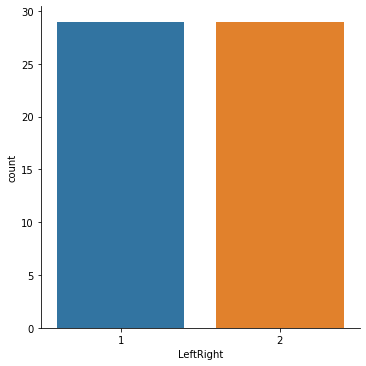

In [11]:
# Plotting frequency
sns.catplot(x=df['LeftRight'][exp2&exp1], kind='count', data=df)

Have no idea what is happening!

### Miscellaneous

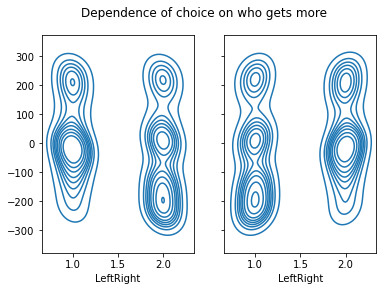

In [12]:
# Plotting kernel density plots for Me vs Other

fig1, axes1 = plt.subplots(nrows=1, ncols=2, sharey='row')
fig1.suptitle('Dependence of choice on who gets more')

kde1 = sns.kdeplot(x=df['LeftRight'], y=diff_L, ax=axes1[0])
## kde1.set_ylabel('Difference of payoffs in Left')
kde2 = sns.kdeplot(x=df['LeftRight'], y=diff_R, ax=axes1[1])
## kde2.set_ylabel('Difference of payoffs in Right')

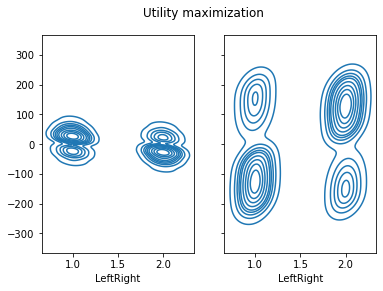

In [13]:
# Plotting kde plot for Left vs Right

fig2, axes2 = plt.subplots(nrows=1, ncols=2, sharey='row')
fig2.suptitle('Utility maximization')

kde3 = sns.kdeplot(x=df['LeftRight'], y=diff_me, ax=axes2[0])
## kde3.set_ylabel('Difference of payoffs for Me')
kde4 = sns.kdeplot(x=df['LeftRight'], y=diff_other, ax=axes2[1])
## kde4.set_ylabel('Difference of payoffs for Other')

# Grid Search

Method: Brute force

Split the data set into two: one in which participants choose self payoff more than other payoff and the other which is the other way round.
- ignoring the entries where equal payoffs are chosen for both participants

then regress for alpha and beta seperately (using gridsearchcv)

30/06/22:

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [15]:
# Preparing the data set for Gridsearch
# y is LeftRight
# x1 is self payoff
# x2 is other payoff
# y = (1-alpha)x1+(alpha)x2 in data_alpha and y = (1-beta)x1+(beta)x2

In [16]:
df_alpha = pd.DataFrame(index=pd.Index(index), columns=['y', 'x1', 'x2'])
df_alpha[['y', 'x1', 'x2']] = df[['LeftRight', 'MeLeft', 'OtherLeft']][df['MeLeft']>df['OtherLeft']]
df_alpha[['y', 'x1', 'x2']] = df[['LeftRight', 'MeRight', 'OtherRight']][df['MeRight']>df['OtherRight']]
df_alpha.dropna(inplace=True)
df_alpha['x2'] = df_alpha['x2']-df_alpha['x1']
df_alpha.head()

,y,x1,x2
1,2.0,267.0,-255.0
4,2.0,241.0,-201.0
6,2.0,250.0,-202.0
7,1.0,260.0,-10.0
8,2.0,270.0,-138.0


In [17]:
df_beta = pd.DataFrame(index=pd.Index(index), columns=['y', 'x1', 'x2'])
df_beta[['y', 'x1', 'x2']] = df[['LeftRight', 'MeLeft', 'OtherLeft']][df['MeLeft']<df['OtherLeft']]
df_beta[['y', 'x1', 'x2']] = df[['LeftRight', 'MeRight', 'OtherRight']][df['MeRight']<df['OtherRight']]
df_beta['x2'] = df_beta['x2']-df_beta['x1']
df_beta.dropna(inplace=True)
df_beta.head()

,y,x1,x2
2,1.0,52.0,148.0
3,2.0,63.0,90.0
5,2.0,95.0,15.0
9,2.0,110.0,40.0
10,1.0,140.0,140.0


In [18]:
grid = {'C': np.logspace(-6, 0, 50), 'penalty': ['l1', 'l2']} # 10 raised to the power -0.30102999566 gives 0.5
logreg=LogisticRegression(solver = 'liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=3,scoring='f1')

logreg_cv.fit(df_alpha[['x1', 'x2']], df_alpha['y'])

print("tuned hyperparameters: (best parameters) ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

tuned hyperparameters: (best parameters)  {'C': 1e-06, 'penalty': 'l1'}
best score : 0.6323056165088263


In [19]:
grid = {'C': np.logspace(-0.7, -0.1249387366, 100), 'penalty': ['l1', 'l2']} # 10 raised to the power -0.1249387366 gives 0.75
logreg=LogisticRegression(solver = 'liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=3,scoring='f1')

logreg_cv.fit(df_beta[['x1', 'x2']], df_beta['y'])

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.19952623149688797, 'penalty': 'l2'}
best score : 0.7984006874341709
